In [4]:
import numpy as np
import pandas as pd

In [7]:
# 二、Get the Data
# 2.Download the Data

import os
# 确定文件路径
# csv_path=os.path.join("D:\Code\Python\Advanced Machine Learning Project\cardio_dataset.csv")
# turn the dataset into a Pandas DataFrame object
cardio_dataset=pd.read_csv("cardiovascular_diagnosis.csv", sep = ';')

In [8]:
# 3.Take a quick look at the data structure

# take a look at the  top five rows
cardio_dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# The info() method: get a quick description of the data, in particular the total 
# number of rows, each attribute's type and number of non-null values
cardio_dataset.info() 
# We can see that there is no missing data. All attributes are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
#find out what categories exist and how many people belong to each category
print(cardio_dataset["gender"].value_counts())
print(cardio_dataset["cholesterol"].value_counts()) 
print(cardio_dataset["gluc"].value_counts()) 
print(cardio_dataset["smoke"].value_counts()) 
print(cardio_dataset["alco"].value_counts()) 
print(cardio_dataset["active"].value_counts())
print(cardio_dataset["cardio"].value_counts())

1    45530
2    24470
Name: gender, dtype: int64
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
1    59479
3     5331
2     5190
Name: gluc, dtype: int64
0    63831
1     6169
Name: smoke, dtype: int64
0    66236
1     3764
Name: alco, dtype: int64
1    56261
0    13739
Name: active, dtype: int64
0    35021
1    34979
Name: cardio, dtype: int64


In [11]:
# show the summary of the numerical attributes
# std--standard deviation标准差
cardio_dataset.describe()
# 年龄最小也是成年人，身高最低最高明显都不属于正常人的范畴，会对结果有较大的偏离影响，
# 为了预测结果的一般性，应该去除这些数据。体重单位kg，舒张压收缩压都具有一眼就能看出来
# 的不正常数据。

# 这里需要阐述清楚各个features的单位分别是什么，对于categorical attribute，说明清楚各
# 个数字所代表的含义。

# 需要注意有没有某些features（或者target）的数据是有封顶的。虽然我们的这个数据集里没有
# ，但是要在report里面也提及。因为如果是target有cap，这会导致模型的出的预测结果无法超
# 过cap。参考是pdf——P73

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


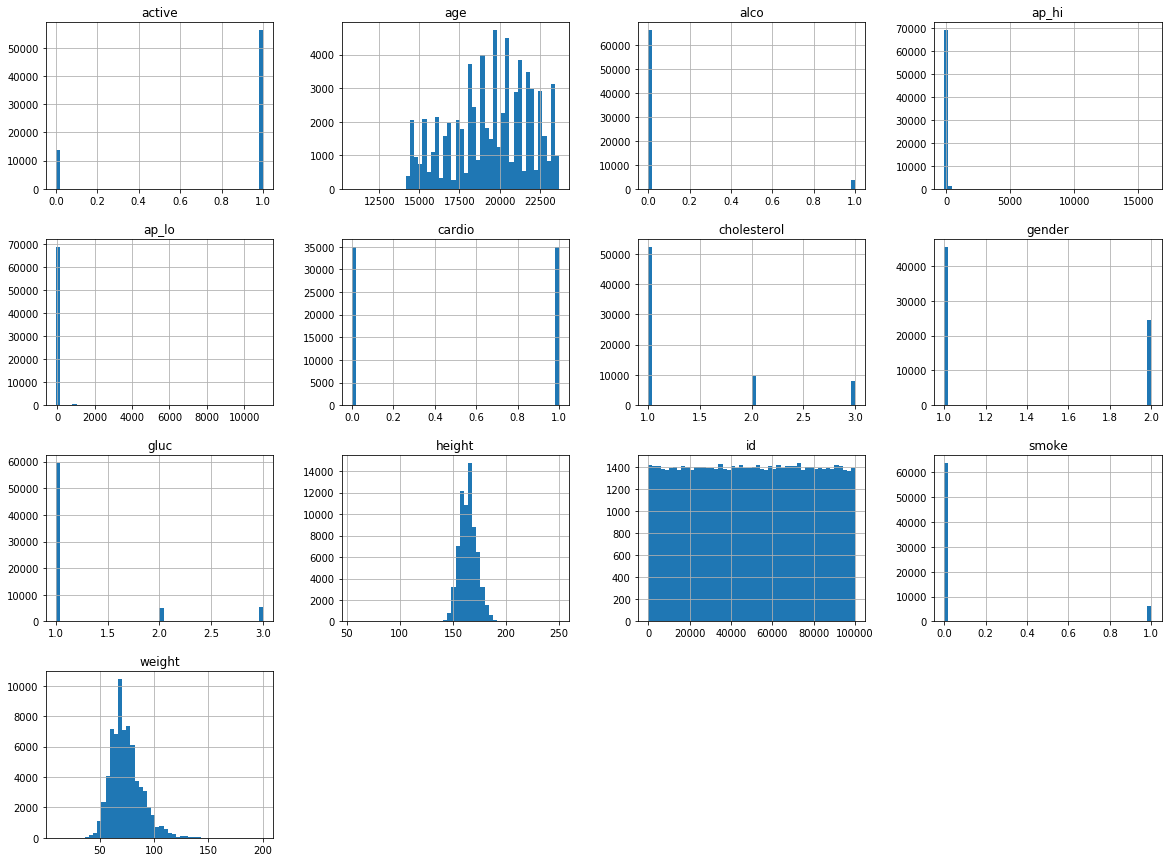

In [12]:
%matplotlib inline  
import matplotlib.pyplot as plt



cardio_dataset.hist(bins=50,figsize=(20,15))
plt.show()

# attributes have very different scales
# some are tail heavy.偏置严重，即有极少数数据远离大部分的数据。之后会有说怎么处理。

In [13]:
# 4.Create a test set

# 分测试集的基本原理
# # Create a test set
# # import numpy as np

# def split_train_test(data, test_ratio):
#     # 洗牌指数——随机排列（随机排列的数的多少）。如（10）——随机排列0~9
#     # 返回的是array
#     shuffled_indices = np.random.permutation(len(data))
    
#     # The int() function converts the specified(指定) value into an integer number.
#     # 规则：输入2.99，输出2
#     test_set_size = int(len(data)*test_ratio)
    
#     # [:a]--取数组的前a个；[a:]--取数组除前a个的其他数
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
    
#     # 分配对应位置上的样本到指定的集合
#     return data.iloc[train_indices],data.iloc[test_indice]

# 缺点：
# 1.if you run the program again, it will generate a different test set!
#   Solution: 在第一次运行时保存测试集；           
#             set random number generator's seed.    np.random.seed(42）
# 
#   但如果数据集有更新这些方法都会崩


In [14]:
# 使用哈希函数来分离测试集
import hashlib

# identifier,就是样本里面的id列，hash代表使用的哈希函数
def test_set_check(identifier, test_ratio, hash):
    
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

# data就是我们的总的数据集，id_column就是我们数据集里的id列，hash=来选用哈希函数
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    # 选取数据集里面的id列
    ids = data[id_column]  
    # 浏览器收藏夹——知识积累——python；得到测试集样本对应的id（组成的数组）
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    # ~in_test_set：除测试集之外的，做训练集。
    return data.loc[~in_test_set], data.loc[in_test_set]



train_set_hash, test_set_hash = split_train_test_by_id(cardio_dataset, 0.2, "id")
train_set_hash.info() 
# 由程序运行结果看，分出来的训练集与测试集的比例并不一定严格等于设定的比例。这是因为
# 哈希函数只是尽量使样本的对应哈希值均匀分布，并且样本对应哈希值的分布也不是严格均匀
# 的，这里我们是取的哈希值的最后一个字节（8位），可能在一些地方比较密集，一些地方比较
# 稀疏。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55757 entries, 0 to 69998
Data columns (total 13 columns):
id             55757 non-null int64
age            55757 non-null int64
gender         55757 non-null int64
height         55757 non-null int64
weight         55757 non-null float64
ap_hi          55757 non-null int64
ap_lo          55757 non-null int64
cholesterol    55757 non-null int64
gluc           55757 non-null int64
smoke          55757 non-null int64
alco           55757 non-null int64
active         55757 non-null int64
cardio         55757 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.0 MB


In [15]:
from sklearn.model_selection import train_test_split
train_set_sk, test_set_sk = train_test_split(cardio_dataset, test_size=0.2, random_state=42)
train_set_sk.info() 
# 这个也有缺点，没有按照性别分层抽样。不过可视情况，看性别对这个分类有无影响。或者其他
# 重要的attribute，问刘翔，分层抽样来分测试集和训练集。pdf P76

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 13 columns):
id             56000 non-null int64
age            56000 non-null int64
gender         56000 non-null int64
height         56000 non-null int64
weight         56000 non-null float64
ap_hi          56000 non-null int64
ap_lo          56000 non-null int64
cholesterol    56000 non-null int64
gluc           56000 non-null int64
smoke          56000 non-null int64
alco           56000 non-null int64
active         56000 non-null int64
cardio         56000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.0 MB


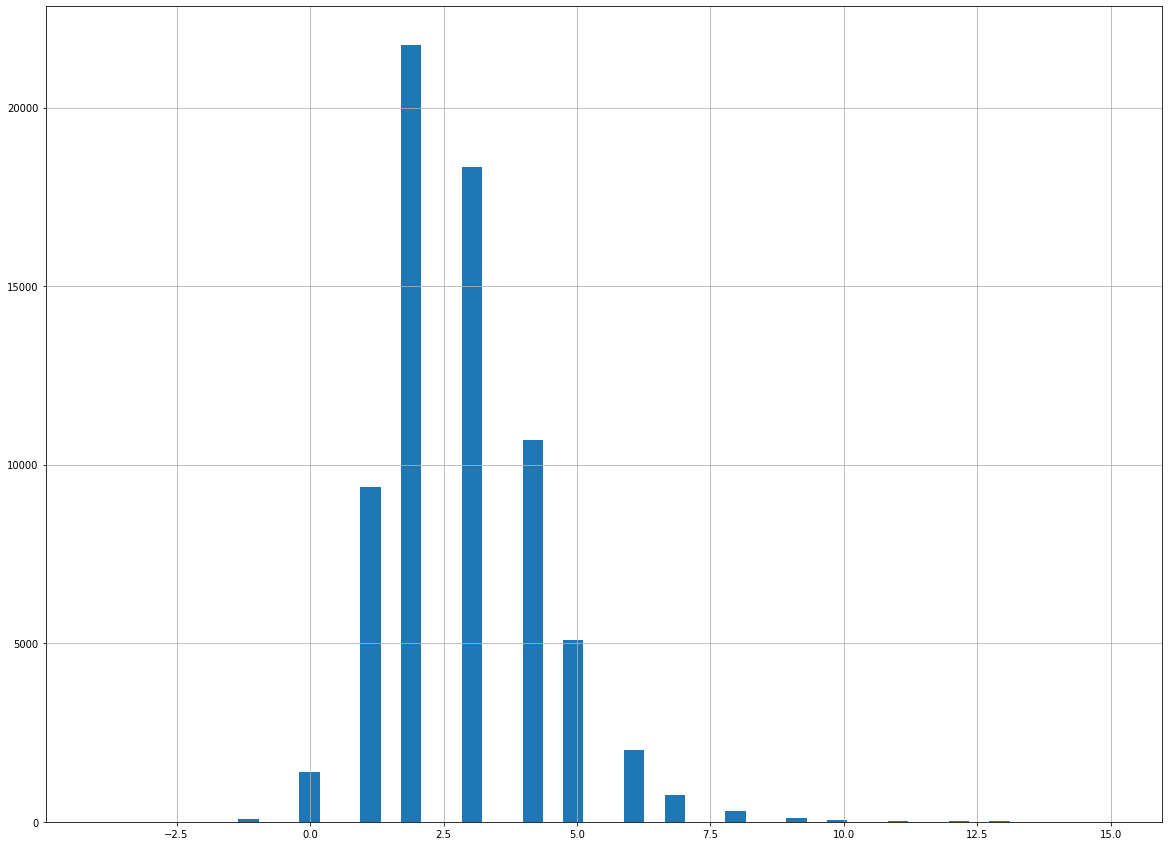

In [16]:
# np.ceil,求出数组中大于等于这个数的最小的整数,虽然数值是整数，但是不会改变数据类型，
# 还是float
# 对整个数组中的每一个元素都做这个该操作

# 这个会在数据集中新增一列数据
cardio_dataset["weight_cat"] = np.ceil((cardio_dataset["weight"] - 50)/ 10)
cardio_dataset.head(5)

# cardio_dataset.info()

cardio_dataset["weight_cat"].hist(bins=50,figsize=(20,15))
plt.show()

# cardio_dataset.describe()

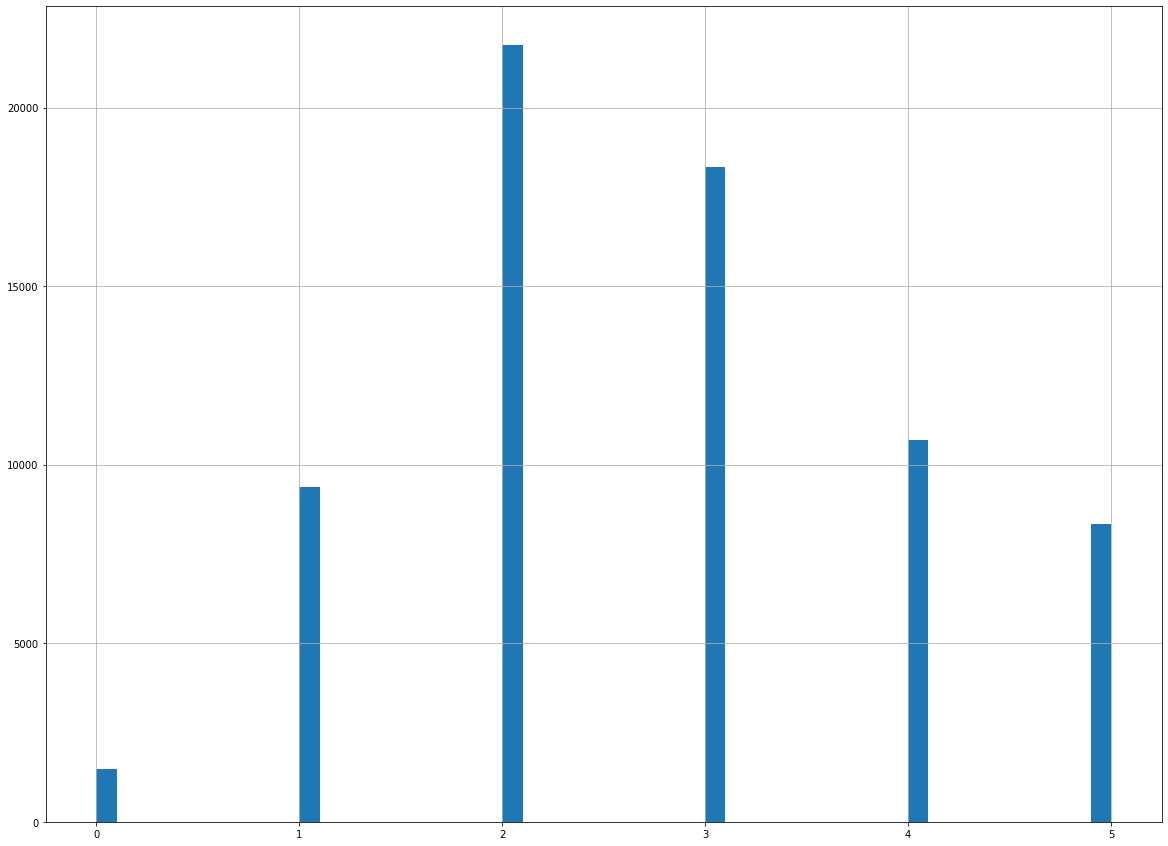

In [17]:
# 把大于5.0的全部归到5.0
cardio_dataset["weight_cat"].where(cardio_dataset["weight_cat"] < 5, 5.0, inplace=True)
# 把小于0.0的全部归到0.0
cardio_dataset["weight_cat"].where(cardio_dataset["weight_cat"] > 0, 0.0, inplace=True)
# cardio_dataset.head(5)
cardio_dataset["weight_cat"].hist(bins=50,figsize=(20,15))
plt.show()

# 这里就将一个数值型attribute转换成category型的

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cardio_dataset, cardio_dataset["weight_cat"]):
    cardio_train_set = cardio_dataset.loc[train_index] 
    cardio_test_set = cardio_dataset.loc[test_index]

    
cardio_train_set.info()

# 查看"weight_cat"的每一类的占比
# cardio_dataset["weight_cat"].value_counts()/len(cardio_dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 38685 to 54292
Data columns (total 14 columns):
id             56000 non-null int64
age            56000 non-null int64
gender         56000 non-null int64
height         56000 non-null int64
weight         56000 non-null float64
ap_hi          56000 non-null int64
ap_lo          56000 non-null int64
cholesterol    56000 non-null int64
gluc           56000 non-null int64
smoke          56000 non-null int64
alco           56000 non-null int64
active         56000 non-null int64
cardio         56000 non-null int64
weight_cat     56000 non-null float64
dtypes: float64(2), int64(12)
memory usage: 6.4 MB


In [19]:
# 在按比例分好训练集与测试集之后移除新添加的attribute
# 这个程序段只能跑一次，重复跑会报错，因为第一次跑的时候已经把那一列删了
for set_ in (cardio_train_set, cardio_test_set): 
    set_.drop("weight_cat", axis=1, inplace=True)

cardio_train_set.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 38685 to 54292
Data columns (total 13 columns):
id             56000 non-null int64
age            56000 non-null int64
gender         56000 non-null int64
height         56000 non-null int64
weight         56000 non-null float64
ap_hi          56000 non-null int64
ap_lo          56000 non-null int64
cholesterol    56000 non-null int64
gluc           56000 non-null int64
smoke          56000 non-null int64
alco           56000 non-null int64
active         56000 non-null int64
cardio         56000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.0 MB


In [20]:
# 三、Discover and Visualize the Data to Gain Insights


# 0.make a copy
cardio = cardio_train_set.copy()

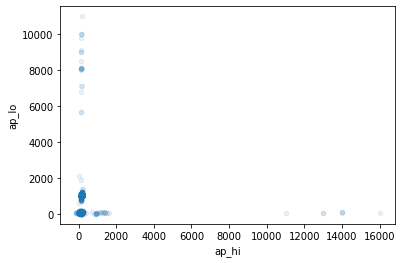

In [21]:
# 1.Visualizing geographical data (data relationship)
cardio.plot(kind="scatter",x="ap_hi",y="ap_lo",alpha=0.1)
# 通过添加alpha参数可以更好的观察样本分布的疏密

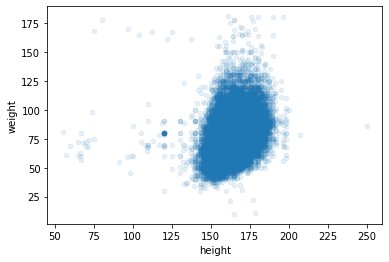

In [22]:
cardio.plot(kind="scatter",x="height",y="weight",alpha=0.1)

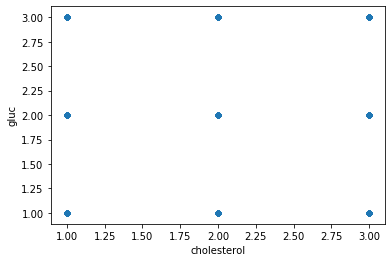

In [23]:
cardio.plot(kind="scatter",x="cholesterol",y="gluc",alpha=0.1)

In [24]:
# 2.Looking for correlations

# calculate correlation coefficient
corr_matrix = cardio.corr()
print(corr_matrix)
# 标准相关系数的解释在P83
# 在写报告的时候写一下各个attributes之间的相关系数的关系，稍微说一下。
# 可以通过这个找出相关系数较高的两个attribute，然后做scatter来看看相关分布如何

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.005058  0.003471 -0.004569  0.000316  0.006562   
age          0.005058  1.000000 -0.022328 -0.084006  0.051734  0.021708   
gender       0.003471 -0.022328  1.000000  0.497654  0.157030  0.004197   
height      -0.004569 -0.084006  0.497654  1.000000  0.289665  0.002831   
weight       0.000316  0.051734  0.157030  0.289665  1.000000  0.030496   
ap_hi        0.006562  0.021708  0.004197  0.002831  0.030496  1.000000   
ap_lo       -0.001300  0.017384  0.015417  0.005880  0.043501  0.015970   
cholesterol  0.007707  0.150993 -0.037035 -0.053469  0.140391  0.022841   
gluc        -0.000655  0.096758 -0.019425 -0.018139  0.106408  0.013705   
smoke       -0.005291 -0.048608  0.336812  0.186011  0.068863 -0.000925   
alco         0.002725 -0.031431  0.170786  0.092791  0.064336  0.001769   
active       0.007297 -0.008769  0.007352 -0.007652 -0.015220 -0.002056   
cardio       0.001380  0.

In [20]:
# 观察其中一个attribute与其他attributes之间的相关系数
corr_matrix["cholesterol"].sort_values(ascending=False)

cholesterol    1.000000
gluc           0.450202
cardio         0.217842
age            0.150993
weight         0.140391
alco           0.035597
ap_hi          0.022841
ap_lo          0.021305
smoke          0.010153
active         0.008056
id             0.007707
gender        -0.037035
height        -0.053469
Name: cholesterol, dtype: float64

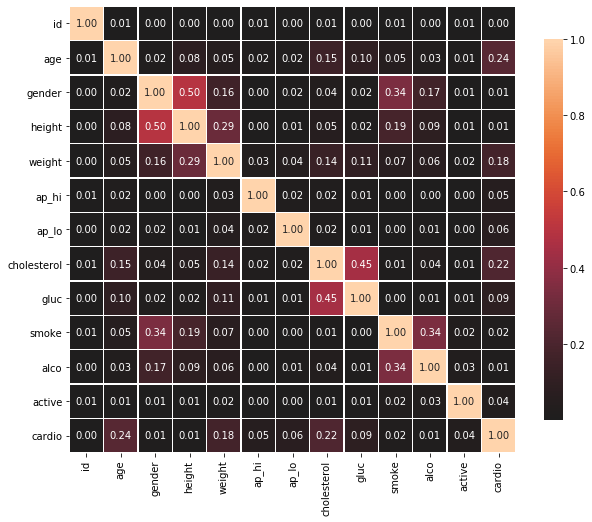

In [25]:
import seaborn as sns
correlations = abs(cardio.corr())
plt.figure(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

In [26]:
# 画出来很丑，没什么必要

# from pandas.plotting import scatter_matrix
# attributes = ["age", "weight", "ap_hi", "ap_lo"] 
# scatter_matrix(cardio[attributes], figsize=(12, 8))


In [27]:
# 3.Experimenting with Attribute Combinations

# 通过结合两个feature来得到对模型更有用的新的feature
# 例如：结合身高体重得到BMI指数
# BMI是kg/m**2(体重除以身高的平方)，体重用于计算的数会远大于身高，因此BMI会与体重高度线性相关

# 这个操作会“cardio数据集”新增加一个feature
# 新增BMI：kg/(m**2)
cardio["BMI"]=cardio["weight"]/(cardio["weight"]/100)**2
# 新增平均动脉压MAP=1/3 SBP + 2/3 DBP。SBP收缩压（高压），DBP舒张压（低压）。实际应用中MAP比SBP和DBP更好，详见收藏夹网页http://www.360doc.com/content/19/0719/19/11257249_849820036.shtml
cardio["MAP"]=(1/3)*cardio["ap_hi"] + (2/3)*cardio["ap_lo"]


corr_matrix = cardio.corr()
print(corr_matrix)

# 但是这个数据结合之后，BMI相对于cardio的相关系数（-0.179118）比weight（0.181660）更小。
# 所以这个结合估计可能不太成功，有待考证。（书上是结合之后对target的相关系数更大了，但
# 是书上是回归target，我们的是classification target）

# 新增的MAP对cardio的相关系数是0.08，比收缩压0.05和舒张压0.06对cardio的相关系数更高，说明这个结合有效。

# 由于这个结合不是单纯的相加，因此应该不会造成多重共线性



                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.005058  0.003471 -0.004569  0.000316  0.006562   
age          0.005058  1.000000 -0.022328 -0.084006  0.051734  0.021708   
gender       0.003471 -0.022328  1.000000  0.497654  0.157030  0.004197   
height      -0.004569 -0.084006  0.497654  1.000000  0.289665  0.002831   
weight       0.000316  0.051734  0.157030  0.289665  1.000000  0.030496   
ap_hi        0.006562  0.021708  0.004197  0.002831  0.030496  1.000000   
ap_lo       -0.001300  0.017384  0.015417  0.005880  0.043501  0.015970   
cholesterol  0.007707  0.150993 -0.037035 -0.053469  0.140391  0.022841   
gluc        -0.000655  0.096758 -0.019425 -0.018139  0.106408  0.013705   
smoke       -0.005291 -0.048608  0.336812  0.186011  0.068863 -0.000925   
alco         0.002725 -0.031431  0.170786  0.092791  0.064336  0.001769   
active       0.007297 -0.008769  0.007352 -0.007652 -0.015220 -0.002056   
cardio       0.001380  0.

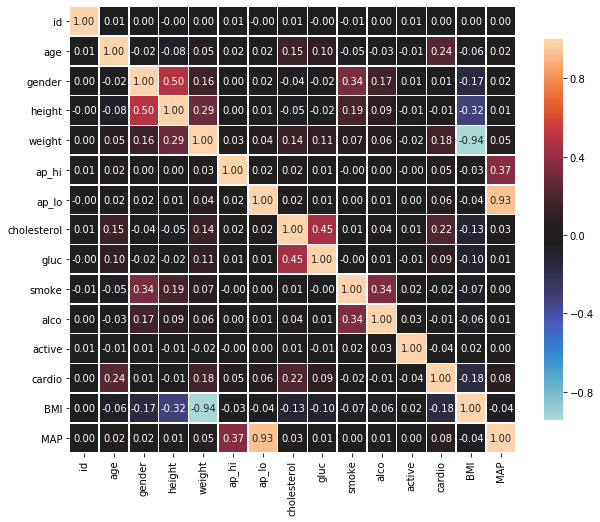

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlations = cardio.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [29]:
# 四、Prepare the Data for Machine Learning Algorithms (EDA重点) 
# 0.预处理数据前把feature和target(label) 分开

# cardio是已经分好的训练集，在三、的开头赋值的
cardio = cardio.drop("cardio",axis=1) #axis=1--按列操作；这个第一次运行就要屏蔽，否则会报错，因为清除了之后就没有target列了


cardio_targets = cardio_train_set["cardio"].copy
cardio.head(8)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,MAP
38685,55234,22611,2,164,78.0,130,80,3,1,0,1,1,128.205128,96.666667
56982,81340,17501,1,161,121.0,110,70,1,1,0,0,1,82.644628,83.333333
44208,63150,17737,2,165,78.0,120,90,1,1,0,0,0,128.205128,100.000000
28236,40363,21068,2,167,89.0,120,80,1,1,0,0,1,112.359551,93.333333
14047,20039,14492,1,156,66.0,110,70,1,1,0,0,1,151.515152,83.333333
43012,61448,18857,1,156,86.0,120,80,1,1,0,0,0,116.279070,93.333333
43165,61662,14657,1,178,96.0,130,90,1,1,0,0,0,104.166667,103.333333
15587,22270,15942,1,164,103.0,150,1000,2,1,0,0,1,97.087379,716.666667


In [25]:
# 1.Data cleaning


# 处理缺失数据

# 扔掉对应样本数据
# cardio.dropna(subset=["对应feature"])
# 扔掉这个feature
# cardio.drop("对应feature", axis=1)
# 补充失去的数据替换,用该feature的mean
# 1.普通做法
# median=cardio["对应feature"].median()
# cardio["对应feature"].fillna(median,inplace=True)

# 重点：2.sklearn
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median") # 设定填补的数据形式（中位数）
# housing_copy=housing.copy() # 要先做复制
# housing_num=housing_copy.drop("text feature",axis=1)# 去除text feature，因为只有数值型attributes能计算中位数
# imputer.fit(housing_num)    # 学习每个feature的中位数
# X=imputer.transform(housing_num)  #用中位数填充空白值

# imputer.statistics_  # 将各个feature的中位数存在这
# print(housing_num.median().values) #对应feature的中位数（和statistics_对比）



In [26]:
# 2.Handling Text and Categorical Attributes 

# one-hot encoder for text feature
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
La_encoder = LabelEncoder()
onehotencoder = OneHotEncoder() 
cardio_cat = cardio["gender"]


cardio_cat_1hot = onehotencoder.fit_transform(cardio_cat.values.reshape(-1, 1))
print(cardio_cat_1hot.toarray())

# 书上说下面这种好用，结果实践起来不好用，还是上面的好
# from sklearn.preprocessing import LabelBinarizer
# LabelBinarizer_encoder = LabelBinarizer()
# cardio_cat_1hot = encoder.fit_transform(cardio_cat.values.reshape(-1, 1))
# print(cardio_cat_1hot)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\76819\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
from sklearn.compose import ColumnTransformer
# http://datascienceopen.com/how-to-use-the-onehotencoder-directly/
# transformer = ColumnTransformer(
#     transformers=[
#         ("OneHot",        # Just a name
#          OneHotEncoder(), # The transformer class
#          [3]              # The column(s) to be applied on.
#          )
#     ],
#     remainder='passthrough' # donot apply anything to the remaining columns
# )



# cardio_gluc = cardio["gluc"] # 这里的cardio_gluc是'Series' object，要将其转成array
# 可用命令 cardio_gluc.values将其转换成array



# reshape的用途 https://www.youtube.com/watch?v=3wi0lJPfLUY
# reshape(-1,1)将(70000,)的array转换成(70000,1)的array
# cardio_gluc_1hot = ColumnTransformer.fit_transform(cardio_gluc.values.reshape(-1,1))


In [28]:
df = np.random.randn(12)

# 在设定行数或者列数是-1时，系统会随机分配一个数据。顺序是看你非零的行数或者列数是多少，
# 然后按照数据量分配合适的列数或者行数。
# 比如在这里，设定3行-1列，就会分成三行，12/3=4列
df.reshape(3,-1)

# reshape(-1,1)——将数组变成列向量
df.reshape(-1,1)

df.reshape(1,-1)

# df.shape

array([[-0.23281037,  1.35279539,  0.59272008,  1.14733347,  0.38568449,
         1.53819087,  0.95447274,  0.69627688,  0.20907096,  0.07586999,
        -0.16821695, -0.32704657]])

In [29]:
# 3.Custom Transformers
# 这个就是自定义transformer

